# 2.4.7 K-Means++ Analysis

In [1]:
import csv
import pandas as pd
import numpy as np

Now we do our analysis using only the following two datasets: `features.csv` and `tracks.csv`.

In [2]:
features = pd.read_csv('./features.csv')

In [3]:
tracks = pd.read_csv('./tracks.csv')

### Merge two dataset

Now let's merge the two documents. as before, we use `track_id` as the key to join them.

In [4]:
two_data = tracks.merge(features, on='track_id')

In [5]:
two_data.shape

(106574, 571)

In [6]:
two_data.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


### Cleaning of the total dataset

First of all we check if there are any duplicates.

In [7]:
two_data.drop_duplicates()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,0.128410,0.022547,0.019816,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385
106570,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059
106571,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,0.108324,0.017540,0.020471,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904
106572,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,0.088311,0.018328,0.017936,6.188604,0.167480,0.041480,0.038086,0.004883,1.818740,0.020133


There are no duplicates because the number of rows remains unchanged.

Now I replace missing numeric values with the mean and missing string values with a space.

In [8]:
for col in two_data.columns:
    if two_data[col].isnull().any() == True:
        if two_data[col].dtypes == 'object':
            two_data[col] = two_data[col].fillna("")
        else:
            val = two_data[col].mean()
            two_data[col] = two_data[col].fillna(val)

In [9]:
two_data.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,,4,1,<p></p>,6073,,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,,4,1,<p></p>,6073,,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,,4,1,<p></p>,6073,,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,,4,6,,47632,,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


Finally I delete the symbols that are left in the columns containing strings, such as some html tags.

In [10]:
for col in two_data.columns:
    if two_data[col].dtypes == 'object':
        two_data[col] = two_data[col].str.replace(r'<[^<>]*>', '', regex=True)

In [11]:
for col in two_data.columns:
    if two_data[col].dtypes == 'object':
        two_data[col] = two_data[col].replace("\n", "")
        two_data[col] = two_data[col].replace("\t", "")

In [12]:
two_data.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,,4,1,,6073,,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,,4,1,,6073,,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,,4,1,,6073,,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,,4,6,,47632,,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,,2,4,"""spiritual songs"" from Nicky Cook",2710,,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


### Dimensionality reduction

As before, we want to use the PCA method to reduce the size of our dataset.

In [13]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

We select again all the numeric variables.

In [14]:
ds2 = two_data.select_dtypes([np.number])

But there are some numeric variables we don't want to be changed. So for the moment we don't consider them. Once the reduction has been applied, we will reinsert the columns that will interest us.

In [15]:
ds2 = ds2.drop(["album_id", "artist_id", "track_duration", "album_comments", "album_listens", "album_tracks"], axis = 1)

In [16]:
print(ds2.shape)
ds2.head()

(106574, 530)


,track_id,album_favorites,artist_comments,artist_favorites,artist_latitude,artist_longitude,track_bit_rate,track_comments,track_favorites,track_interest,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,4,0,9,40.058324,-74.405661,256000,0,2,4656,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,4,0,9,40.058324,-74.405661,256000,0,1,1470,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,4,0,9,40.058324,-74.405661,256000,0,6,1933,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,4,3,74,39.901626,-38.668642,192000,0,178,54881,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,2,2,10,51.895927,0.891874,256000,0,0,978,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


Before applying PCA we need to normalize the features. we do this using "preprocessing.StandardScaler" from the "sklearn" library. With this function we "standardize" the features by removing the mean and scaling to unit variance.

In [17]:
scaler = preprocessing.StandardScaler()

As before, we standardize the whole dataset, but not the `track_id` column, because we don't want it to be changed.

In [18]:
temp_ds2 = pd.DataFrame(scaler.fit_transform(ds2[ds2.columns[1:]].values), columns = ds2.columns[1:])

In [19]:
temp_ds2.head()

,album_favorites,artist_comments,artist_favorites,artist_latitude,artist_longitude,track_bit_rate,track_comments,track_favorites,track_interest,track_listens,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,0.865961,-0.300859,-0.209350,1.328778e-02,-8.473421e-01,-0.107577,-0.098205,-0.087505,0.058614,-0.129092,...,-1.200560,-1.537657,-1.595043,-0.266432,0.425841,1.007362,0.874131,-0.454603,-0.369213,0.775698
1,0.865961,-0.300859,-0.209350,1.328778e-02,-8.473421e-01,-0.107577,-0.098205,-0.161504,-0.108917,-0.226127,...,-0.938948,-1.210805,-0.675913,-0.299409,0.463112,0.975158,0.643107,-0.454603,-0.491744,1.064853
2,0.865961,-0.300859,-0.209350,1.328778e-02,-8.473421e-01,-0.107577,-0.098205,0.208490,-0.084571,-0.146780,...,-1.561604,-1.461126,-1.162622,-0.254636,-0.034719,0.011006,-0.065367,-0.454603,-0.335249,0.167182
3,0.865961,0.175510,0.437346,6.447103e-14,-2.358624e-15,-1.053999,-0.098205,12.936260,2.699625,5.954839,...,-0.655213,-0.595296,-1.299392,-0.090255,0.385908,0.758699,0.889532,-0.454603,0.107731,0.018234
4,0.227599,0.016720,-0.199400,1.017104e+00,9.379990e-01,-0.107577,-0.098205,-0.235502,-0.134788,-0.245185,...,-0.098756,0.151932,-0.085646,-0.143811,0.481748,-0.169453,-0.111572,-0.265064,-0.008018,-0.341557


Now we can apply PCA.

We can pass how much variance we want PCA to capture. If we pass 0.71 as a parameter to the PCA model, it means that PCA will hold 71% of the variance and the number of components required to capture 71% variance will be used.

In [20]:
pca = PCA(0.71)

In [21]:
ds_pca = pca.fit_transform(temp_ds2)

Therefore the number of components needed to maintain 71% of the variance is the following:

In [22]:
pca.n_components_

54

In fact, we can see that the total variance retained is, more or less, the one we have passed as a parameter:

In [23]:
print(sum(pca.explained_variance_ratio_))

0.7102406122937427


Now let's convert the PCA result into a dataframe and name the columns.

In [24]:
final_temp_ds2 = pd.DataFrame(ds_pca, columns = ['Feature_%i' % i for i in range(54)])

In [25]:
print(final_temp_ds2.shape)
final_temp_ds2.head()

(106574, 54)


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53
0,2.071006,-3.075296,-5.556977,0.068496,2.255373,-3.618791,-5.028607,-0.916878,-5.097625,-4.085829,...,-1.774458,-1.183364,-0.149342,-0.704221,1.733779,0.350332,0.850438,0.562608,0.312432,-2.150291
1,3.522058,-5.365361,-4.317184,-1.124669,-3.044923,2.251967,-0.227389,4.718958,-0.600873,-3.425511,...,-0.646504,-0.033542,0.728803,-0.514138,2.182189,-1.316554,-0.377167,0.409909,-0.852269,-0.189478
2,0.963621,-3.160727,-3.482567,-0.944500,-1.101613,0.475784,-2.376769,1.254699,0.989708,-1.740110,...,-0.434548,-0.996258,0.101106,-1.295546,2.027610,-0.401895,1.917310,0.060698,-0.520811,-3.021218
3,6.500540,1.484680,-4.812206,-0.986068,-2.015332,0.139932,0.220120,3.853658,0.328750,-2.976393,...,-0.364702,-1.020500,-0.516472,-0.914984,-0.805675,0.090384,0.037177,-0.721729,-1.901766,-0.981322
4,0.863905,-1.135431,2.975712,-0.822828,-2.384612,4.566369,-0.169936,-1.829952,1.030909,-2.027141,...,-0.871433,0.134657,-0.639161,-0.659302,-0.709447,-0.077393,1.023658,-0.191043,0.288428,-0.172413


### Clustering with K-Means++

In [26]:
from sklearn.cluster import KMeans

Before applying K_Means++ we need to find the optimal number of clusters. Then we build two graphs by computing K-Means++ with a number of clusters in a range (1,10). Then from the graphs we will try to understand what is the optimal number of clusters.

In the following algorithm we compute these variables:
* **Distortion:** It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
* **Inertia:** It is the sum of squared distances of samples to their closest cluster center.

We calculate the "distortion" and "inertia" for each value of k (that is, the naumber of clusters) in the given range, (1,10).

In [27]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(final_temp_ds2)
 
    distortions.append(sum(np.min(cdist(final_temp_ds2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / final_temp_ds2.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(final_temp_ds2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / final_temp_ds2.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [28]:
import matplotlib.pyplot as plt

Now we plot the two graphs and we see which is the optimal number of clusters.

This is the graph using "distortion".

1 : 17.087214663408723
2 : 16.089516216204448
3 : 15.59864242807944
4 : 15.583425554084876
5 : 15.331317527884124
6 : 15.159184249718207
7 : 14.984767366403778
8 : 14.831271311920867
9 : 14.822683178228427


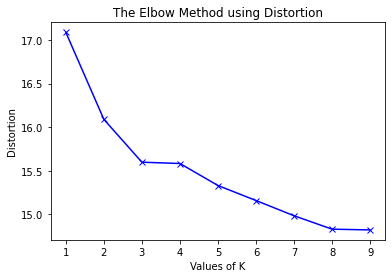

In [29]:
for key, val in mapping1.items():
    print(f'{key} : {val}')
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In this case we see that the optimal number of clusters is 3. But for confirmation we use the `KneeLocator` function from the `kneed` library which helps us to understand which is the optimal number of clusters.

In [30]:
from kneed import KneeLocator

In [31]:
kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")

In [32]:
kl.elbow

3

This is the graph using "inertia".

1 : 40041693.81472001
2 : 36073857.411396205
3 : 34223433.22476629
4 : 32888897.03942386
5 : 31872145.021192145
6 : 31060040.928461198
7 : 30432902.161847144
8 : 29922575.228965633
9 : 29119271.944307573


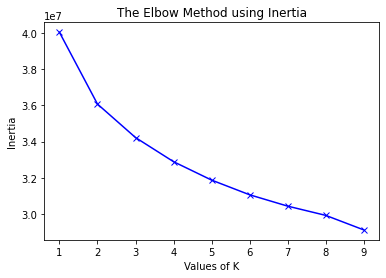

In [33]:
for key, val in mapping2.items():
    print(f'{key} : {val}')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In this case it is not very clear from the graph which is the optimal number of clusters. Therefore, as in the previous case, we use the `KneeLocator` function to better understand which is the optimal number to choose.

In [34]:
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")

In [35]:
kl.elbow

3

Now we can apply K-Means++. Since in both cases we have obtained 3 as the optimal number of clusters, 3 will be the number of clusters we will use.

In [36]:
our_model = KMeans(n_clusters=3)

In [37]:
our_model.fit(final_temp_ds2)

KMeans(n_clusters=3)

In [38]:
cluster = our_model.predict(final_temp_ds2)

Now let's add the column where each row indicates each song which cluster it belongs to.

In [39]:
final_temp_ds2['Cluster'] = 0
final_temp_ds2['Cluster'] = cluster

In [40]:
final_temp_ds2.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Cluster
0,2.071006,-3.075296,-5.556977,0.068496,2.255373,-3.618791,-5.028607,-0.916878,-5.097625,-4.085829,...,-1.183364,-0.149342,-0.704221,1.733779,0.350332,0.850438,0.562608,0.312432,-2.150291,2
1,3.522058,-5.365361,-4.317184,-1.124669,-3.044923,2.251967,-0.227389,4.718958,-0.600873,-3.425511,...,-0.033542,0.728803,-0.514138,2.182189,-1.316554,-0.377167,0.409909,-0.852269,-0.189478,2
2,0.963621,-3.160727,-3.482567,-0.944500,-1.101613,0.475784,-2.376769,1.254699,0.989708,-1.740110,...,-0.996258,0.101106,-1.295546,2.027610,-0.401895,1.917310,0.060698,-0.520811,-3.021218,2
3,6.500540,1.484680,-4.812206,-0.986068,-2.015332,0.139932,0.220120,3.853658,0.328750,-2.976393,...,-1.020500,-0.516472,-0.914984,-0.805675,0.090384,0.037177,-0.721729,-1.901766,-0.981322,0
4,0.863905,-1.135431,2.975712,-0.822828,-2.384612,4.566369,-0.169936,-1.829952,1.030909,-2.027141,...,0.134657,-0.639161,-0.659302,-0.709447,-0.077393,1.023658,-0.191043,0.288428,-0.172413,2


Now we can add again some columns that will be useful to us in our analysis.

In [41]:
final_ds2 = pd.concat([two_data['track_genre_top'], final_temp_ds2], axis = 1)

In [42]:
final_ds2 = pd.concat([two_data['track_duration'], final_ds2], axis = 1)

In [43]:
final_ds2 = pd.concat([two_data['track_language_code'], final_ds2], axis = 1)

In [44]:
final_ds2 = pd.concat([two_data['artist_location'], final_ds2], axis = 1)

In [45]:
final_ds2 = pd.concat([two_data['album_tracks'], final_ds2], axis = 1)

In [46]:
final_ds2 = pd.concat([two_data['album_type'], final_ds2], axis = 1)

In [47]:
final_ds2 = pd.concat([two_data['album_listens'], final_ds2], axis = 1)

In [48]:
final_ds2 = pd.concat([two_data['album_comments'], final_ds2], axis = 1)

In [49]:
final_ds2 = pd.concat([two_data['artist_id'], final_ds2], axis = 1)

In [50]:
final_ds2 = pd.concat([two_data['album_id'], final_ds2], axis = 1)

In [51]:
final_ds2 = pd.concat([two_data['track_id'], final_ds2], axis = 1)

This is our final dataset.

In [52]:
print(final_ds2.shape)
final_ds2.head()

(106574, 66)


,track_id,album_id,artist_id,album_comments,album_listens,album_type,album_tracks,artist_location,track_language_code,track_duration,...,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Cluster
0,2,1,1,0,6073,Album,7,New Jersey,en,168,...,-1.183364,-0.149342,-0.704221,1.733779,0.350332,0.850438,0.562608,0.312432,-2.150291,2
1,3,1,1,0,6073,Album,7,New Jersey,en,237,...,-0.033542,0.728803,-0.514138,2.182189,-1.316554,-0.377167,0.409909,-0.852269,-0.189478,2
2,5,1,1,0,6073,Album,7,New Jersey,en,206,...,-0.996258,0.101106,-1.295546,2.027610,-0.401895,1.917310,0.060698,-0.520811,-3.021218,2
3,10,6,6,0,47632,Album,2,,en,161,...,-1.020500,-0.516472,-0.914984,-0.805675,0.090384,0.037177,-0.721729,-1.901766,-0.981322,0
4,20,4,4,0,2710,Album,13,Colchester England,en,311,...,0.134657,-0.639161,-0.659302,-0.709447,-0.077393,1.023658,-0.191043,0.288428,-0.172413,2


### Characterize your clusters

Now we build a function that will be useful to us to build our pivot tables.

In [55]:
def table(col, ds):
    
    # If the column is nuemric, I divide it into 4 categories
    if ds[col].dtypes == 'int64' or ds[col].dtypes == 'float64':
        ds[col] = pd.qcut(ds[col], q=4)
        
    # I create the table, normalized by columns
    table = pd.crosstab(ds[col], ds['Cluster'], normalize='columns') * 100
    
    # I add the column "Total" at the end of the table
    total = pd.Series(table.sum(axis=0).to_list(), name='Total')
    table = table.append(total).round(2)
    
    # I name the columns
    table.columns = [f'Cluster # {i}' for i in range (3)]
    
    return table

##### 1 - Track duration

In [56]:
table('track_duration', final_ds2)

,Cluster # 0,Cluster # 1,Cluster # 2
track_duration,,,
"(-0.001, 149.0]",36.62,26.12,15.89
"(149.0, 216.0]",25.73,24.57,24.74
"(216.0, 305.0]",19.54,23.16,30.23
"(305.0, 18350.0]",18.11,26.14,29.14
Total,100.00,100.00,100.00


We can see that most of the elements in "Cluster # 0" are in the first range, while most of the elements in "Cluster # 1" are in the fourth range. As regards the elements of "Cluster # 2", on the other hand, we see that most of them are in the third interval.

##### 2 - Track language

In [57]:
table('track_language_code', final_ds2)

,Cluster # 0,Cluster # 1,Cluster # 2
track_language_code,,,
,84.70,85.77,86.87
ar,0.00,0.03,0.00
az,0.00,0.00,0.00
bg,0.00,0.02,0.00
bm,0.00,0.00,0.00
cs,0.01,0.00,0.00
de,0.01,0.16,0.03
ee,0.02,0.00,0.00
el,0.01,0.01,0.00


In this case we can see that most of the elements of all clusters are in English.

##### 3 - Album tracks

In [58]:
table('album_tracks', final_ds2)

,Cluster # 0,Cluster # 1,Cluster # 2
album_tracks,,,
"(-1.001, 7.0]",28.25,30.40,30.21
"(7.0, 11.0]",25.45,23.49,23.32
"(11.0, 17.0]",20.61,21.04,22.73
"(17.0, 652.0]",25.69,25.07,23.74
Total,100.00,100.00,100.00


In this case we can see that most of the elements of all clusters are in the first range.

##### 4 - Album type

In [59]:
table('album_type', final_ds2)

,Cluster # 0,Cluster # 1,Cluster # 2
album_type,,,
,5.03,7.92,5.57
Album,78.13,80.05,86.58
Contest,0.01,0.02,0.01
Live Performance,6.83,4.99,3.01
Radio Program,9.03,6.14,4.07
Single Tracks,0.96,0.88,0.77
Total,100.00,100.00,100.00


Most of the elements of all clusters are albums.

##### 5 - Album listens

In [60]:
table('album_listens', final_ds2)

,Cluster # 0,Cluster # 1,Cluster # 2
album_listens,,,
"(-1.001, 3361.0]",29.61,22.22,23.71
"(3361.0, 8982.0]",28.33,22.49,24.43
"(8982.0, 23635.0]",23.02,24.42,26.85
"(23635.0, 3564243.0]",19.04,30.87,25.02
Total,100.00,100.00,100.00


We can see that most of the elements in "Cluster # 0" are in the first range, while most of the elements in "Cluster # 1" are in the fourth range. As regards the elements of "Cluster # 2", on the other hand, we see that most of them are in the third interval.

##### 6 - Track genre

In [61]:
table('track_genre_top', final_ds2)

,Cluster # 0,Cluster # 1,Cluster # 2
track_genre_top,,,
,46.26,60.17,53.78
Blues,0.03,0.19,0.09
Classical,0.09,3.66,0.10
Country,0.17,0.20,0.18
Easy Listening,0.00,0.03,0.04
Electronic,6.34,3.96,14.09
Experimental,11.89,9.61,8.81
Folk,1.04,6.28,1.12
Hip-Hop,1.86,0.44,6.51


We can see that most of the elements in "Cluster # 0" and in "Cluster # 1" are "Experimental", while most of the elements in "Cluster # 2" are "Electronic".

In our opinion, perhaps it is better to have fewer observations with more features because, even if the observations are few, they are well characterized and we have the opportunity to analyze and describe them better. If, on the other hand, we have many observations with fewer features, it will be more difficult to try to describe well the observations we have and therefore the analysis will be less accurate.